In [5]:
#Basic AstroCV example
#Detect galaxies on a sample image
#
#We provide a pre-compiled version of darknet to run remotely, however
#for local use, you should clone https://github.com/astroCV/darknet
# and you should install https://github.com/astroCV/pyyolo
import pyyolo
import numpy as np
import sys
from PIL import Image, ImageEnhance
import matplotlib.patches as patches
import matplotlib.pyplot as plt
#import PIL.ImageOps  
import time

In [6]:
darknet_path = './data/darknet' #darknet path
datacfg = '../sdss.data' #relative to darknet path
cfgfile = '../sdss.cfg' #relative to darknet path
weightfile = '/data/astrocv/galaxy_sdss.weights'
filename = 'data/1140_301_1_206.jpg' #image sample 1
#filename = 'data/1045_301_2_129.jpg' #image sample 2
thresh = 0.15  #detection threshold
hier_thresh = 0.5

In [7]:
t1=time.time()
pyyolo.init(darknet_path, datacfg, cfgfile, weightfile) #init and load network
print('Initialization time = %5.3f seconds'%(time.time()-t1))
t1=time.time()
outputs = pyyolo.test(filename, thresh, hier_thresh, 0) #load image and process
print('Load from file + Image processing time = %5.3f seconds'%(time.time()-t1))
for output in outputs:
        print(output)
pyyolo.cleanup()

Initialization time = 3.832 seconds
Image processing time = 0.521 seconds
{'top': 154, 'bottom': 237, 'prob': 0.5482710003852844, 'right': 1980, 'left': 1917, 'class': 'Spiral'}
{'top': 311, 'bottom': 347, 'prob': 0.2450096607208252, 'right': 765, 'left': 739, 'class': 'Edge-on'}
{'top': 597, 'bottom': 624, 'prob': 0.2180824875831604, 'right': 371, 'left': 351, 'class': 'Edge-on'}
{'top': 588, 'bottom': 617, 'prob': 0.2931666374206543, 'right': 837, 'left': 815, 'class': 'Elliptical '}
{'top': 804, 'bottom': 829, 'prob': 0.27022939920425415, 'right': 122, 'left': 104, 'class': 'Elliptical '}
{'top': 1279, 'bottom': 1337, 'prob': 0.5358549356460571, 'right': 1158, 'left': 1117, 'class': 'Elliptical '}
{'top': 1433, 'bottom': 1462, 'prob': 0.1902736872434616, 'right': 93, 'left': 71, 'class': 'Edge-on'}
{'top': 241, 'bottom': 343, 'prob': 0.20493187010288239, 'right': 629, 'left': 565, 'class': 'Spiral'}
{'top': 996, 'bottom': 1143, 'prob': 0.3441798985004425, 'right': 1102, 'left': 978,

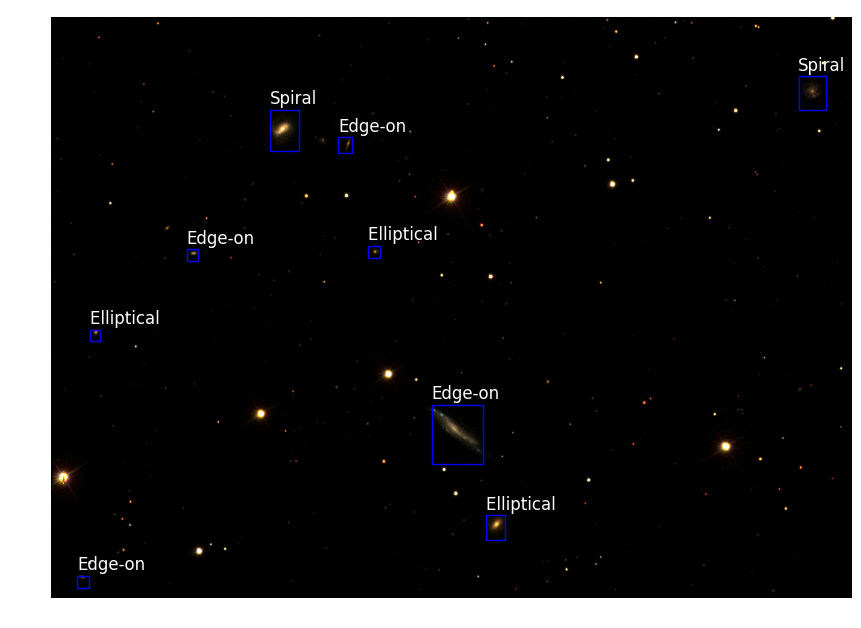

In [8]:
#plot image and detections
img = Image.open(filename)
contrast = ImageEnhance.Contrast(img)
img2 = contrast.enhance(3)
fig,ax = plt.subplots(figsize=(8,6))
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(img2)
ax.set_aspect('equal')
for output in outputs:
        r=output['right']
        l=output['left']
        t=output['top']
        b=output['bottom']
        rect = patches.Rectangle((l-4,t-3),r-l+8,b-t+4,linewidth=1,edgecolor='b',facecolor='none')      
        ax.add_patch(rect)
        ax.annotate(output['class'],(l-5,t-17),color='w',fontsize=12)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0) 
#plt.savefig('sample.jpg',dpi=220) 
plt.show()

